<h3><b>Note:you don't need to visit this notebook you can visit directly Final RE </b>
<br>
<b> I am using  This Notebook for practice(Purspose :Reduce complexity and Maintain good code in Final RE ) </b>
    </h3>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import scipy as sm 
from statsmodels.stats.anova import anova_lm
import scipy.stats as st 

In [3]:
movie_ind=pd.read_csv('../../data/country_movies/IND_NF.csv')
movie_ind.head(100)

,week,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent
0,37,Movie,Unbroken,USA,Drama,2014-12-25,False,72%,51%,IND,https://flixpatrol.com/title/unbroken,ASI
1,37,TV Show,Masaba Masaba,India,Comedy,2020-08-28,True,68%,NaN,IND,https://flixpatrol.com/title/masaba-masaba,ASI
2,36,Movie,Class of '83,India,Drama,2020-08-21,False,NaN,20%,IND,https://flixpatrol.com/title/class-of-83,ASI
3,36,TV Show,Masaba Masaba,India,Comedy,2020-08-28,True,68%,NaN,IND,https://flixpatrol.com/title/masaba-masaba,ASI
4,35,Movie,Class of '83,India,Drama,2020-08-21,False,NaN,20%,IND,https://flixpatrol.com/title/class-of-83,ASI
5,35,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83%,87%,IND,https://flixpatrol.com/title/lucifer,ASI
6,34,Movie,Gunjan Saxena: The Kargil Girl,India,War,2020-08-12,False,31%,100%,IND,https://flixpatrol.com/title/gunjan-saxena-the...,ASI
7,34,TV Show,Dark Desire,Mexico,Drama,2020-07-15,True,75%,NaN,IND,https://flixpatrol.com/title/dark-desire,ASI
8,33,Movie,Raat Akeli Hai,India,Crime,2020-07-31,False,78%,NaN,IND,https://flixpatrol.com/title/raat-akeli-hai,ASI
9,33,TV Show,Dark Desire,Mexico,Drama,2020-07-15,True,75%,NaN,IND,https://flixpatrol.com/title/dark-desire,ASI


In [4]:
movie_ind_blueprint=movie_ind.copy()

In [5]:
movie_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   week           48 non-null     int64 
 1   show_type      48 non-null     object
 2   title          48 non-null     object
 3   ori_country    48 non-null     object
 4   genre          48 non-null     object
 5   release_date   48 non-null     object
 6   is_NF_Ori      48 non-null     bool  
 7   imdb_rating    40 non-null     object
 8   rt_rating      34 non-null     object
 9   country_chart  48 non-null     object
 10  show_link      48 non-null     object
 11  Continent      48 non-null     object
dtypes: bool(1), int64(1), object(10)
memory usage: 4.3+ KB


In [6]:
movie_ind=movie_ind.loc[:,['week','show_type','title','ori_country','genre','release_date','imdb_rating','rt_rating','is_NF_Ori']]
movie_ind['imdb_rating']=movie_ind['imdb_rating'].apply(lambda x :np.nan if pd.isnull(x) else float(x[0:-1]))
movie_ind['rt_rating']=movie_ind['rt_rating'].apply(lambda x :    np.nan if pd.isnull(x) else float(x[0:-1]))


In [7]:
movie_ind

,week,show_type,title,ori_country,genre,release_date,imdb_rating,rt_rating,is_NF_Ori
0,37,Movie,Unbroken,USA,Drama,2014-12-25,72.0,51.0,False
1,37,TV Show,Masaba Masaba,India,Comedy,2020-08-28,68.0,NaN,True
2,36,Movie,Class of '83,India,Drama,2020-08-21,NaN,20.0,False
3,36,TV Show,Masaba Masaba,India,Comedy,2020-08-28,68.0,NaN,True
4,35,Movie,Class of '83,India,Drama,2020-08-21,NaN,20.0,False
5,35,TV Show,Lucifer,USA,Superhero,2016-01-25,83.0,87.0,True
6,34,Movie,Gunjan Saxena: The Kargil Girl,India,War,2020-08-12,31.0,100.0,False
7,34,TV Show,Dark Desire,Mexico,Drama,2020-07-15,75.0,NaN,True
8,33,Movie,Raat Akeli Hai,India,Crime,2020-07-31,78.0,NaN,False
9,33,TV Show,Dark Desire,Mexico,Drama,2020-07-15,75.0,NaN,True


In [8]:
movie_inde=movie_ind.copy()

In [9]:
movie_ind.shape

(48, 9)

In [10]:
movie_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   week          48 non-null     int64  
 1   show_type     48 non-null     object 
 2   title         48 non-null     object 
 3   ori_country   48 non-null     object 
 4   genre         48 non-null     object 
 5   release_date  48 non-null     object 
 6   imdb_rating   40 non-null     float64
 7   rt_rating     34 non-null     float64
 8   is_NF_Ori     48 non-null     bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 3.2+ KB


In [11]:
%matplotlib inline

In [12]:
movie_ind.columns


Index(['week', 'show_type', 'title', 'ori_country', 'genre', 'release_date',
       'imdb_rating', 'rt_rating', 'is_NF_Ori'],
      dtype='object')

In [13]:
len(movie_ind['title'].unique())

28

In [14]:

movie_ind_no_null=movie_ind.dropna()

In [15]:
movie_ind_no_null

,week,show_type,title,ori_country,genre,release_date,imdb_rating,rt_rating,is_NF_Ori
0,37,Movie,Unbroken,USA,Drama,2014-12-25,72.0,51.0,False
5,35,TV Show,Lucifer,USA,Superhero,2016-01-25,83.0,87.0,True
6,34,Movie,Gunjan Saxena: The Kargil Girl,India,War,2020-08-12,31.0,100.0,False
11,32,TV Show,The Umbrella Academy,USA,Superhero,2019-02-15,83.0,82.0,True
12,31,Movie,The Kissing Booth 2,United Kingdom,Romance,2020-07-24,62.0,28.0,True
16,29,Movie,The Old Guard,USA,Superhero,2020-07-10,82.0,80.0,True
17,29,TV Show,Dark,Germany,Mystery,2017-12-01,87.0,94.0,True
19,28,TV Show,Dark,Germany,Mystery,2017-12-01,87.0,94.0,True
20,27,Movie,Bulbbul,India,Horror,2020-06-24,66.0,90.0,False
21,27,TV Show,Dark,Germany,Mystery,2017-12-01,87.0,94.0,True


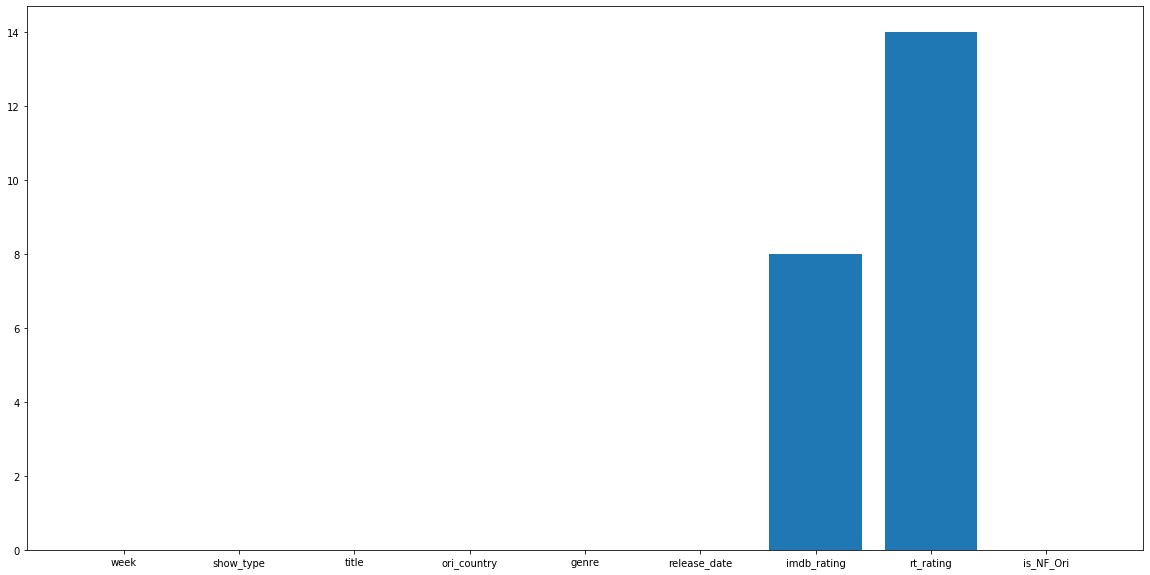

In [16]:
nan_columns = []
nan_values = []

for column in movie_ind.columns:
    
    nan_columns.append(column)
    nan_values.append(movie_ind[column].isnull().sum())
    

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(nan_columns, nan_values)
plt.show()

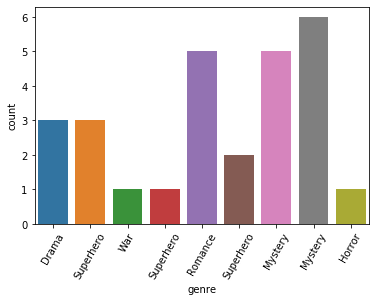

In [17]:
sns.countplot(movie_ind_no_null['genre']).set_xticklabels(movie_ind_no_null['genre'],rotation=60)
plt.show()

In [18]:
movie_ind_no_null['show_type'].unique()

array(['Movie', 'TV Show'], dtype=object)

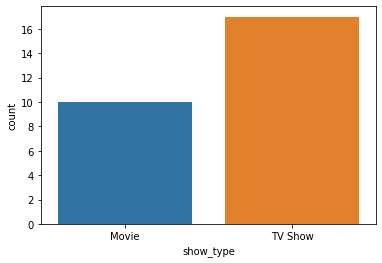

In [19]:

sns.countplot(movie_ind_no_null['show_type'])

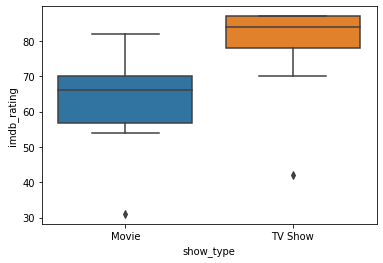

In [20]:
sns.boxplot('show_type','imdb_rating',data=movie_ind_no_null)

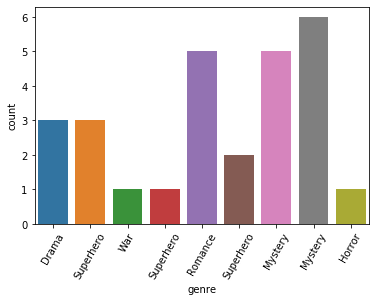

In [21]:
sns.countplot(movie_ind_no_null['genre']).set_xticklabels(movie_ind_no_null['genre'],rotation=60)
plt.show()

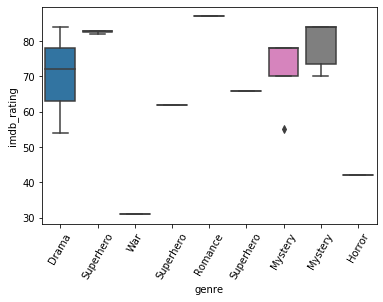

In [22]:
sns.boxplot(movie_ind_no_null['genre'],movie_ind_no_null['imdb_rating']).set_xticklabels(movie_ind_no_null['genre'],rotation=60)
plt.show()

In [23]:
movie_ind_no_null['ori_country'].unique()

array(['USA', 'India', 'United Kingdom', 'Germany', 'Spain', 'Italy'],
      dtype=object)

%matplotlib inline

[Text(0, 0, 'USA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Italy')]

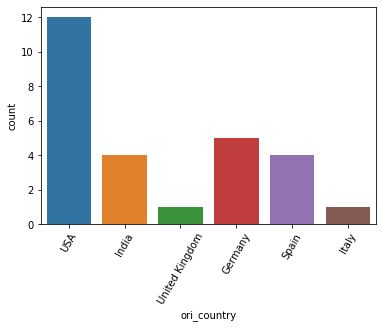

In [24]:
sns.countplot(movie_ind_no_null['ori_country']).set_xticklabels(movie_ind_no_null['ori_country'].unique(),rotation=60)

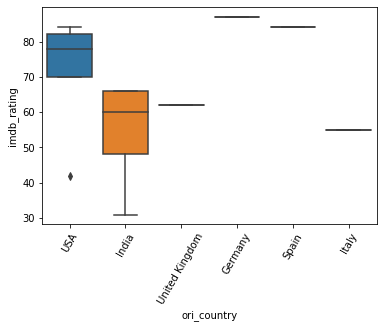

In [25]:
sns.boxplot(movie_ind_no_null['ori_country'],movie_ind_no_null['imdb_rating']).set_xticklabels(movie_ind_no_null['ori_country'].unique(),rotation=60)
plt.show()

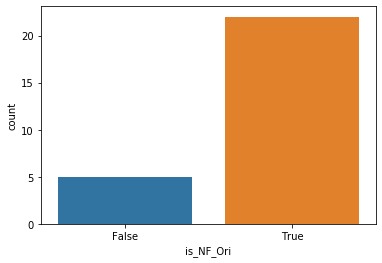

In [26]:
sns.countplot(movie_ind_no_null['is_NF_Ori'])

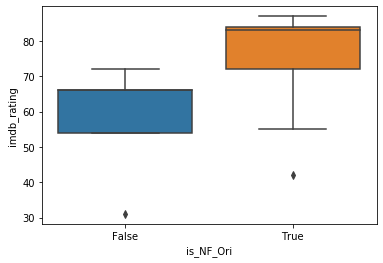

In [27]:
sns.boxplot('is_NF_Ori','imdb_rating',data=movie_ind_no_null)

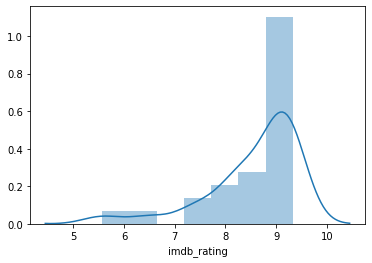

In [28]:
sns.distplot(np.sqrt(movie_ind_no_null['imdb_rating']))

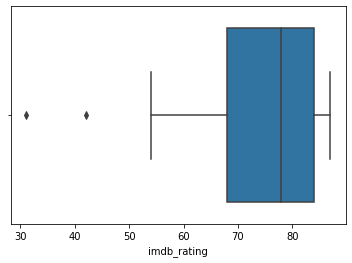

In [29]:
sns.boxplot(movie_ind_no_null['imdb_rating'])

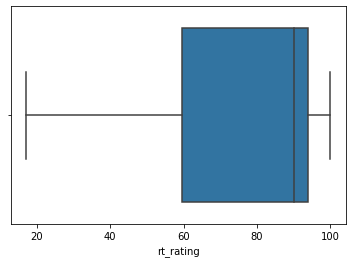

In [30]:
sns.boxplot(movie_ind_no_null['rt_rating'])

In [31]:
movie_ind_no_null

,week,show_type,title,ori_country,genre,release_date,imdb_rating,rt_rating,is_NF_Ori
0,37,Movie,Unbroken,USA,Drama,2014-12-25,72.0,51.0,False
5,35,TV Show,Lucifer,USA,Superhero,2016-01-25,83.0,87.0,True
6,34,Movie,Gunjan Saxena: The Kargil Girl,India,War,2020-08-12,31.0,100.0,False
11,32,TV Show,The Umbrella Academy,USA,Superhero,2019-02-15,83.0,82.0,True
12,31,Movie,The Kissing Booth 2,United Kingdom,Romance,2020-07-24,62.0,28.0,True
16,29,Movie,The Old Guard,USA,Superhero,2020-07-10,82.0,80.0,True
17,29,TV Show,Dark,Germany,Mystery,2017-12-01,87.0,94.0,True
19,28,TV Show,Dark,Germany,Mystery,2017-12-01,87.0,94.0,True
20,27,Movie,Bulbbul,India,Horror,2020-06-24,66.0,90.0,False
21,27,TV Show,Dark,Germany,Mystery,2017-12-01,87.0,94.0,True


In [32]:
#optional cramer_v 
df=pd.crosstab(movie_ind_no_null['is_NF_Ori'],movie_ind_no_null['show_type'])
n=df.sum().sum()
chi,p,df,array=st.chi2_contingency(df,correction=True)
cramer_v=np.sqrt(chi/n*df)
cramer_v

0.5228597832508984

In [33]:
describe_imdb=movie_ind_no_null['imdb_rating'].describe().to_dict()

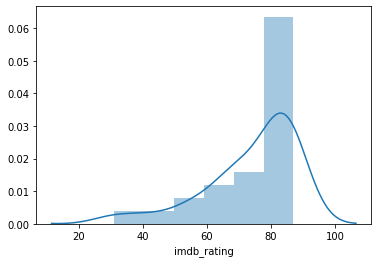

In [34]:
sns.distplot(movie_ind_no_null['imdb_rating'])

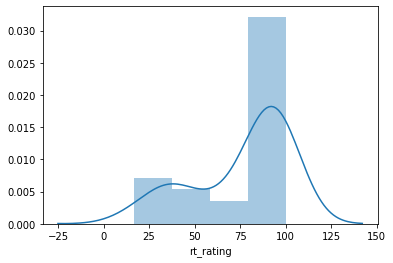

In [35]:
sns.distplot(movie_ind_no_null['rt_rating'])

In [36]:
movie_ind_no_null.groupby('ori_country').agg({'imdb_rating':['median']})

,imdb_rating
,median
ori_country,
Germany,87.0
India,60.0
Italy,55.0
Spain,84.0
USA,78.0
United Kingdom,62.0


In [37]:
len(movie_ind_no_null['imdb_rating'])

27

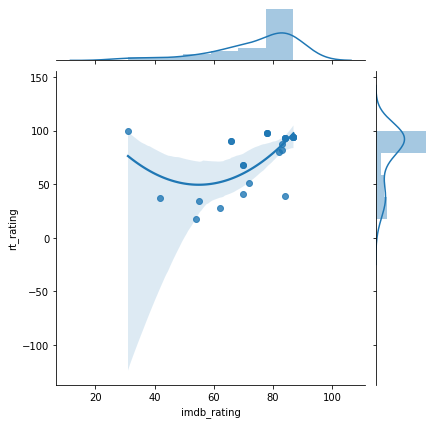

In [38]:
sns.jointplot('imdb_rating','rt_rating',kind='reg',data=movie_ind_no_null,order=2)


In [39]:
model=smf.ols('rt_rating~I(imdb_rating**2)',data=movie_ind_no_null).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rt_rating   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     9.745
Date:                Tue, 17 Nov 2020   Prob (F-statistic):            0.00450
Time:                        17:50:04   Log-Likelihood:                -121.49
No. Observations:                  27   AIC:                             247.0
Df Residuals:                      25   BIC:                             249.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              34.3644     13.985      2.457      0.021       5.562      63.167
I(imdb_rating ** 2)     0.0073      0.002      3.122      0.004       0.002       0.012
==============================================================================
Omnibus:                        1.739   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                0.593
Skew:                           0.001   Prob(JB):                        0.743
Kurtosis:                       3.726   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

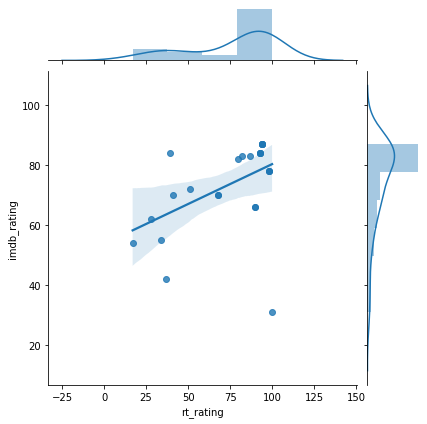

In [40]:
sns.jointplot('rt_rating','imdb_rating',kind='reg',data=movie_ind_no_null,order=1)


In [41]:
model1=smf.ols('imdb_rating~I(rt_rating**1)',data=movie_ind_no_null).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     7.276
Date:                Tue, 17 Nov 2020   Prob (F-statistic):             0.0123
Time:                        17:50:06   Log-Likelihood:                -106.82
No. Observations:                  27   AIC:                             217.6
Df Residuals:                      25   BIC:                             220.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            53.7224      7.893      6.807      0.000      37.467      69.977
I(rt_rating ** 1)     0.2659      0.099      2.697      0.012       0.063       0.469
==============================================================================
Omnibus:                       29.692   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.382
Skew:                          -2.214   Prob(JB):                     6.35e-15
Kurtosis:                       9.205   Cond. No.                         250.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

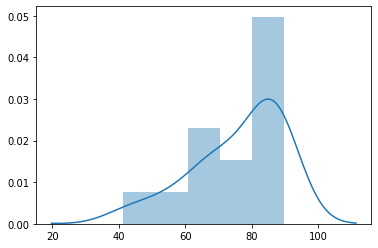

In [42]:
sns.distplot(model.predict())

In [44]:
movie_ind['imdb_rating'].fillna(predict_imdb_rt['imdb_predict'],inplace=True)

In [45]:
movie_ind['rt_rating'].fillna(predict_imdb_rt['rt_predict'],inplace=True)

In [46]:
movie_ind=round(movie_ind,0)
movie_ind.head(100)

,week,show_type,title,ori_country,genre,release_date,imdb_rating,rt_rating,is_NF_Ori
0,37,Movie,Unbroken,USA,Drama,2014-12-25,72.0,51.0,False
1,37,TV Show,Masaba Masaba,India,Comedy,2020-08-28,68.0,68.0,True
2,36,Movie,Class of '83,India,Drama,2020-08-21,59.0,20.0,False
3,36,TV Show,Masaba Masaba,India,Comedy,2020-08-28,68.0,68.0,True
4,35,Movie,Class of '83,India,Drama,2020-08-21,59.0,20.0,False
5,35,TV Show,Lucifer,USA,Superhero,2016-01-25,83.0,87.0,True
6,34,Movie,Gunjan Saxena: The Kargil Girl,India,War,2020-08-12,31.0,100.0,False
7,34,TV Show,Dark Desire,Mexico,Drama,2020-07-15,75.0,76.0,True
8,33,Movie,Raat Akeli Hai,India,Crime,2020-07-31,78.0,79.0,False
9,33,TV Show,Dark Desire,Mexico,Drama,2020-07-15,75.0,76.0,True


In [47]:
col=['show_type','ori_country','genre']

In [48]:
movie_ind['merge_word'] = movie_ind[col].apply(lambda x: ','.join(x), axis=1)

In [49]:
movie_ind

,week,show_type,title,ori_country,genre,release_date,imdb_rating,rt_rating,is_NF_Ori,merge_word
0,37,Movie,Unbroken,USA,Drama,2014-12-25,72.0,51.0,False,"Movie,USA,Drama"
1,37,TV Show,Masaba Masaba,India,Comedy,2020-08-28,68.0,68.0,True,"TV Show,India,Comedy"
2,36,Movie,Class of '83,India,Drama,2020-08-21,59.0,20.0,False,"Movie,India,Drama"
3,36,TV Show,Masaba Masaba,India,Comedy,2020-08-28,68.0,68.0,True,"TV Show,India,Comedy"
4,35,Movie,Class of '83,India,Drama,2020-08-21,59.0,20.0,False,"Movie,India,Drama"
5,35,TV Show,Lucifer,USA,Superhero,2016-01-25,83.0,87.0,True,"TV Show,USA,Superhero"
6,34,Movie,Gunjan Saxena: The Kargil Girl,India,War,2020-08-12,31.0,100.0,False,"Movie,India,War"
7,34,TV Show,Dark Desire,Mexico,Drama,2020-07-15,75.0,76.0,True,"TV Show,Mexico,Drama"
8,33,Movie,Raat Akeli Hai,India,Crime,2020-07-31,78.0,79.0,False,"Movie,India,Crime"
9,33,TV Show,Dark Desire,Mexico,Drama,2020-07-15,75.0,76.0,True,"TV Show,Mexico,Drama"


In [50]:
movie_ind['merge_word']=movie_ind['merge_word'].apply(lambda x: x.split(','))

In [51]:
movie_ind.dropna(axis=0,inplace=True)


In [52]:
movie_ind.shape

(47, 10)

In [53]:
movie_ind.reset_index(drop=True,inplace=True)

In [54]:
matrix=[]
for i in range (movie_ind.shape[0]) :
    s=movie_ind.loc[i,['merge_word']].values[0]
    n1=movie_ind.loc[i,['title']].values
    
    l1=[]
    for j in range(movie_ind.shape[0]):
        
        u= movie_ind.loc[j,['merge_word']].values[0]
        m=0
        if(s[2]==u[2]):
            n2=movie_ind.loc[j,['title']].values
            print(n1,n2)
            p1=float(movie_ind.loc[j,['imdb_rating']])
            p2=float(movie_ind.loc[j,['rt_rating']])
            m=1+((p1+p2)/100)
            
        
 
        
        l1.append(round(m,2))
    matrix.append(l1)
    

['Unbroken'] ['Unbroken']
['Unbroken'] ["Class of '83"]
['Unbroken'] ["Class of '83"]
['Unbroken'] ['Dark Desire']
['Unbroken'] ['Dark Desire']
['Unbroken'] ['13 Reasons Why']
['Unbroken'] ['Love Aaj Kal']
['Masaba Masaba'] ['Masaba Masaba']
['Masaba Masaba'] ['Masaba Masaba']
['Masaba Masaba'] ['MILF']
['Masaba Masaba'] ['Space Force']
['Masaba Masaba'] ['Never Have I Ever']
['Masaba Masaba'] ['Never Have I Ever']
['Masaba Masaba'] ['Never Have I Ever']
['Masaba Masaba'] ['Love. Wedding. Repeat']
["Class of '83"] ['Unbroken']
["Class of '83"] ["Class of '83"]
["Class of '83"] ["Class of '83"]
["Class of '83"] ['Dark Desire']
["Class of '83"] ['Dark Desire']
["Class of '83"] ['13 Reasons Why']
["Class of '83"] ['Love Aaj Kal']
['Masaba Masaba'] ['Masaba Masaba']
['Masaba Masaba'] ['Masaba Masaba']
['Masaba Masaba'] ['MILF']
['Masaba Masaba'] ['Space Force']
['Masaba Masaba'] ['Never Have I Ever']
['Masaba Masaba'] ['Never Have I Ever']
['Masaba Masaba'] ['Never Have I Ever']
['Masaba M

['Money Heist'] ['Extraction']
['Money Heist'] ['Money Heist']
['Money Heist'] ['Money Heist']
['Money Heist'] ['Money Heist']


In [55]:
# matrix=[]
# for i in range (movie_ind.shape[0]) :
#     s=movie_ind.loc[i,['merge_word']].values[0]
    
#     l1=[]
#     for j in range(movie_ind.shape[0]):
        
#         u= movie_ind.loc[j,['merge_word']].values[0]
#         m=len(s.intersection(u))/len(s)
#         if(m>=0.33):
        
#             p1=float(movie_ind.loc[j,['imdb_rating']])
#             p2=float(movie_ind.loc[j,['rt_rating']])
#             P1=float(movie_ind.loc[i,['imdb_rating']])
#             P2=float(movie_ind.loc[i,['rt_rating']])
#             P=(p1+p2-(P1+P2))/100
#             m=m+P
        
        
#         l1.append(round(m,2))
#     matrix.append(l1)
    

In [56]:
final_matrix=np.array(matrix)
final_matrix

array([[2.23, 0.  , 1.79, ..., 0.  , 0.  , 0.  ],
       [0.  , 2.36, 0.  , ..., 0.  , 0.  , 0.  ],
       [2.23, 0.  , 1.79, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 2.77, 0.  , 2.77],
       [0.  , 0.  , 0.  , ..., 0.  , 2.57, 0.  ],
       [0.  , 0.  , 0.  , ..., 2.77, 0.  , 2.77]])

In [57]:
movie_ind.loc[0,['merge_word']].values[0]

['Movie', 'USA', 'Drama']

In [58]:
n1=list(movie_ind['title'])

In [59]:
df_final=pd.DataFrame(data=final_matrix,index=n1,columns=n1)

In [60]:
df_final

,Unbroken,Masaba Masaba,Class of '83,Masaba Masaba,Class of '83,Lucifer,Gunjan Saxena: The Kargil Girl,Dark Desire,Raat Akeli Hai,Dark Desire,...,Extraction,Never Have I Ever,Extraction,Too Hot to Handle,Love. Wedding. Repeat,Money Heist,Money Heist: The Phenomenon,Money Heist,Money Heist: The Phenomenon,Money Heist
Unbroken,2.23,0.00,1.79,0.00,1.79,0.0,0.00,2.51,0.00,2.51,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Masaba Masaba,0.00,2.36,0.00,2.36,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,2.76,0.00,0.00,1.89,0.00,0.00,0.00,0.00,0.00
Class of '83,2.23,0.00,1.79,0.00,1.79,0.0,0.00,2.51,0.00,2.51,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Masaba Masaba,0.00,2.36,0.00,2.36,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,2.76,0.00,0.00,1.89,0.00,0.00,0.00,0.00,0.00
Class of '83,2.23,0.00,1.79,0.00,1.79,0.0,0.00,2.51,0.00,2.51,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Lucifer,0.00,0.00,0.00,0.00,0.00,2.7,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gunjan Saxena: The Kargil Girl,0.00,0.00,0.00,0.00,0.00,0.0,2.31,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dark Desire,2.23,0.00,1.79,0.00,1.79,0.0,0.00,2.51,0.00,2.51,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Raat Akeli Hai,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.57,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dark Desire,2.23,0.00,1.79,0.00,1.79,0.0,0.00,2.51,0.00,2.51,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [61]:
df_final=df_final.loc[~df_final.index.duplicated(keep='first'),~df_final.columns.duplicated(keep='first')]

In [62]:
df_final.columns

Index(['Unbroken', 'Masaba Masaba', 'Class of '83', 'Lucifer',
       'Gunjan Saxena: The Kargil Girl', 'Dark Desire', 'Raat Akeli Hai',
       'The Umbrella Academy', 'The Kissing Booth 2', 'Indian Matchmaking',
       'MILF', 'The Old Guard', 'Dark', 'Bulbbul', '365 Days',
       '13 Reasons Why', 'Malang', 'Space Force', 'Betaal', 'Money Heist',
       'Love Aaj Kal', 'Never Have I Ever', 'Mrs. Serial Killer', 'Extraction',
       'Too Hot to Handle', 'Love. Wedding. Repeat',
       'Money Heist: The Phenomenon'],
      dtype='object')

In [64]:
len(movie_ind_no_null['imdb_rating'])

27

In [65]:
dict_high=movie_ind_no_null['imdb_rating'].value_counts().to_dict()
max_v=max(dict_high.keys())

In [66]:
dict_high

{84.0: 5,
 87.0: 5,
 78.0: 3,
 70.0: 3,
 66.0: 2,
 83.0: 2,
 55.0: 1,
 42.0: 1,
 54.0: 1,
 82.0: 1,
 62.0: 1,
 31.0: 1,
 72.0: 1}

In [67]:
max_v

87.0

In [68]:
dict_high1=movie_ind_no_null['rt_rating'].value_counts().to_dict()
max_v1=max(dict_high1.keys())

In [69]:
max_v1

100.0

In [70]:
movie_ind_no_null['righsk_imdb']=np.log(movie_ind_no_null['imdb_rating'].apply(lambda x:max_v+1-x))
movie_ind_no_null['righsk_rt']=np.log(movie_ind_no_null['rt_rating'].apply(lambda x:max_v1+1-x))

C:\Users\nikhil\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\nikhil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
model=smf.ols('righsk_rt~righsk_imdb',data=movie_ind_no_null).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              righsk_rt   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     3.516
Date:                Tue, 17 Nov 2020   Prob (F-statistic):             0.0725
Time:                        17:50:15   Log-Likelihood:                -40.505
No. Observations:                  27   AIC:                             85.01
Df Residuals:                      25   BIC:                             87.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9651      0.415      4.734      0.000       1.110       2.820
righsk_imdb     0.3280      0.175      1.875      0.072      -0.032       0.688
==============================================================================
Omnibus:                        8.088   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.154
Skew:                          -0.996   Prob(JB):                       0.0461
Kurtosis:                       4.227   Cond. No.                         5.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
[np.e**x for x in model.predict()]

[17.71884803734543,
 12.0984322566724,
 26.880036968861315,
 12.0984322566724,
 20.777943646334567,
 12.844087065140094,
 7.13580781866732,
 7.13580781866732,
 19.66995995885137,
 7.13580781866732,
 19.66995995885137,
 7.13580781866732,
 7.13580781866732,
 11.24447839442398,
 18.41684580234122,
 11.24447839442398,
 22.689261272214615,
 15.187181446984006,
 15.187181446984006,
 18.41684580234122,
 15.187181446984006,
 18.41684580234122,
 25.054417402893524,
 22.468154539261626,
 11.24447839442398,
 11.24447839442398,
 11.24447839442398]

In [73]:
len(movie_ind_no_null['imdb_rating'])

27

In [74]:
# import os
# import glob
# import pandas as pd
# # os.chdir("../data/country_movies")
# os.chdir("../data/country_movies")

# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
# # 

In [75]:
combined_csv=pd.read_csv("../../data/country_movies/country_movie_combine.csv")

In [76]:
combined_csv.head(10)
combined_csv=combined_csv.reset_index()

In [77]:
combined_csv

,index,week,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Continent/the-letter-for-the-king-2020,EUR,rel_yr,rel_mt
0,0,37,Movie,#Alive,South Korea,Horror,2020-09-08,False,62%,86%,ARE,https://flixpatrol.com/title/alive-2020,ASI,NaN,NaN,NaN,NaN
1,1,37,TV Show,Away,USA,Science Fiction,2020-09-04,True,71%,73%,ARE,https://flixpatrol.com/title/away-2020,ASI,NaN,NaN,NaN,NaN
2,2,36,Movie,Skyscraper,USA,Action,2018-07-04,False,61%,48%,ARE,https://flixpatrol.com/title/skyscraper,ASI,NaN,NaN,NaN,NaN
3,3,36,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83%,87%,ARE,https://flixpatrol.com/title/lucifer,ASI,NaN,NaN,NaN,NaN
4,4,35,Movie,Project Power,USA,Action,2020-08-14,True,61%,63%,ARE,https://flixpatrol.com/title/project-power,ASI,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,24219,16,TV Show,Money Heist,Spain,Action,2017-05-02,True,84%,93%,ZAF,https://flixpatrol.com/title/money-heist,AFR,NaN,NaN,NaN,NaN
24220,24220,15,Movie,Fifty Shades Freed,USA,Romance,2018-02-07,False,34%,12%,ZAF,https://flixpatrol.com/title/fifty-shades-freed,AFR,NaN,NaN,NaN,NaN
24221,24221,15,TV Show,Money Heist,Spain,Action,2017-05-02,True,84%,93%,ZAF,https://flixpatrol.com/title/money-heist,AFR,NaN,NaN,NaN,NaN
24222,24222,14,Movie,Coffee & Kareem,USA,Comedy,2020-04-03,True,50%,19%,ZAF,https://flixpatrol.com/title/coffee-kareem,AFR,NaN,NaN,NaN,NaN


In [78]:
def fun(x):
    if(x == None or x==0):
        return np.nan
    elif(isinstance(x,int)):
        return x 
    else:
        try:
            if '%' in x:
                return float(x[0:-1])
        except TypeError:
            
             return float(x)
       

In [79]:
def clean_data(movie_ind):
    
        movie_ind=movie_ind.loc[:,['week','show_type','title','ori_country','genre','release_date','imdb_rating','rt_rating','is_NF_Ori']]
        movie_ind['imdb_rating']=movie_ind['imdb_rating'].apply(lambda x : fun(x))
        movie_ind['rt_rating']=movie_ind['rt_rating'].apply(lambda x :    fun(x))
        
        return movie_ind

In [80]:
df=clean_data(combined_csv)

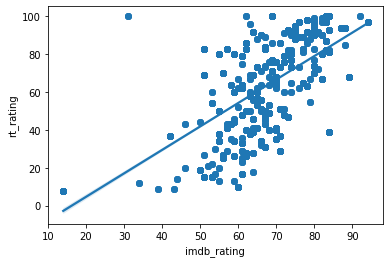

In [81]:
sns.regplot(df['imdb_rating'],df['rt_rating'])

In [82]:
nan_columns = []
nan_values = []
def check_nan(movie_ind):
    for column in movie_ind.columns:

        nan_columns.append(column)
        nan_values.append(movie_ind[column].isnull().sum())


    fig, ax = plt.subplots(figsize=(20,10))
    plt.bar(nan_columns, nan_values)
    plt.show()

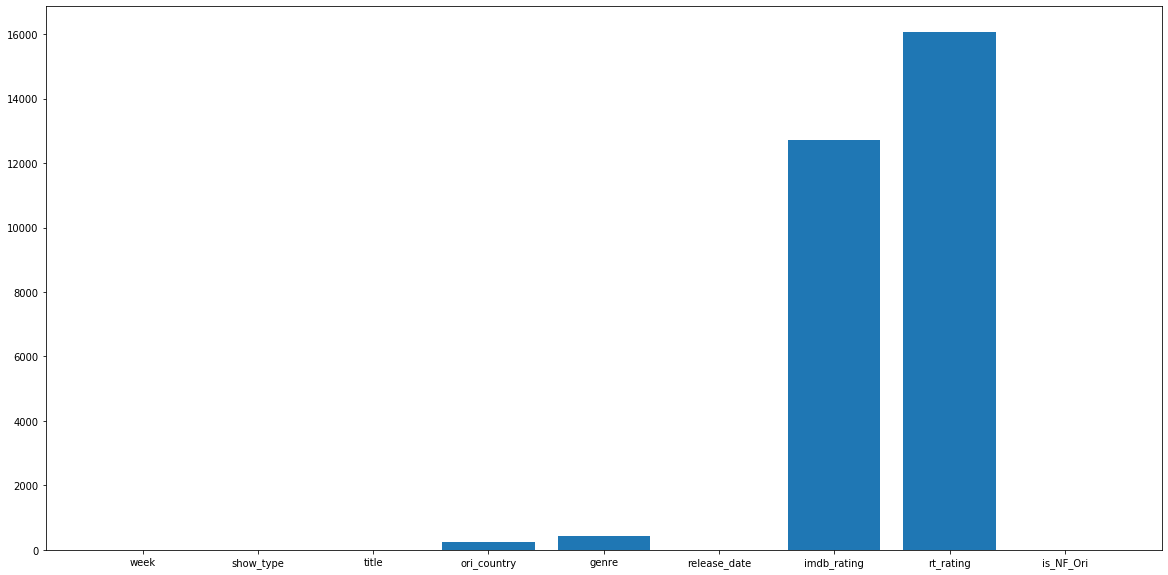

In [83]:
check_nan(df)

In [84]:
df

,week,show_type,title,ori_country,genre,release_date,imdb_rating,rt_rating,is_NF_Ori
0,37,Movie,#Alive,South Korea,Horror,2020-09-08,62.0,86.0,False
1,37,TV Show,Away,USA,Science Fiction,2020-09-04,71.0,73.0,True
2,36,Movie,Skyscraper,USA,Action,2018-07-04,61.0,48.0,False
3,36,TV Show,Lucifer,USA,Superhero,2016-01-25,83.0,87.0,True
4,35,Movie,Project Power,USA,Action,2020-08-14,61.0,63.0,True
...,...,...,...,...,...,...,...,...,...
24219,16,TV Show,Money Heist,Spain,Action,2017-05-02,84.0,93.0,True
24220,15,Movie,Fifty Shades Freed,USA,Romance,2018-02-07,34.0,12.0,False
24221,15,TV Show,Money Heist,Spain,Action,2017-05-02,84.0,93.0,True
24222,14,Movie,Coffee & Kareem,USA,Comedy,2020-04-03,50.0,19.0,True


In [85]:
df

,week,show_type,title,ori_country,genre,release_date,imdb_rating,rt_rating,is_NF_Ori
0,37,Movie,#Alive,South Korea,Horror,2020-09-08,62.0,86.0,False
1,37,TV Show,Away,USA,Science Fiction,2020-09-04,71.0,73.0,True
2,36,Movie,Skyscraper,USA,Action,2018-07-04,61.0,48.0,False
3,36,TV Show,Lucifer,USA,Superhero,2016-01-25,83.0,87.0,True
4,35,Movie,Project Power,USA,Action,2020-08-14,61.0,63.0,True
...,...,...,...,...,...,...,...,...,...
24219,16,TV Show,Money Heist,Spain,Action,2017-05-02,84.0,93.0,True
24220,15,Movie,Fifty Shades Freed,USA,Romance,2018-02-07,34.0,12.0,False
24221,15,TV Show,Money Heist,Spain,Action,2017-05-02,84.0,93.0,True
24222,14,Movie,Coffee & Kareem,USA,Comedy,2020-04-03,50.0,19.0,True


In [86]:
def missing_valuefill(df):
    df_final=df.copy()
    col=['title','ori_country','genre','imdb_rating','rt_rating']
    df=df.dropna(subset=col)

    df=df.groupby('title',as_index=False)['imdb_rating','rt_rating'].median()

    
    model=smf.ols('rt_rating~I(imdb_rating**2)',data=df).fit()
    model1=smf.ols('imdb_rating~I(rt_rating**1)',data=df).fit()
    predict_imdb_rt=pd.DataFrame({'rt_predict':model.predict(df['imdb_rating']),
                              'imdb_predict':model1.predict(df['rt_rating'])})
    df_final['imdb_rating'].fillna(predict_imdb_rt['imdb_predict'],inplace=True)
    df_final['rt_rating'].fillna(predict_imdb_rt['rt_predict'],inplace=True) 
    df_final=round(df_final,0)
    df_final=df_final.dropna()
    df_final.reset_index(drop=True,inplace=True)
    
    return df_final
              

In [87]:
m=missing_valuefill(df)
m=m.groupby(['show_type','title','ori_country','genre','is_NF_Ori'],as_index=False)['imdb_rating','rt_rating'].median()
m.reset_index(0,inplace=True)

C:\Users\nikhil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\nikhil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [88]:
def prepare_data(data):
    col=['show_type','ori_country','genre','is_NF_Ori']
    data['merge_word'] = data[col].values.tolist()
    
    return data

In [89]:
pd.set_option('display.max_rows', 500)

In [90]:
data_ready=prepare_data(m)
data_ready

,index,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,merge_word
0,0,Documentary,Becoming,USA,Documentary,True,64.0,92.0,"[Documentary, USA, Documentary, True]"
1,1,Documentary,Have a Good Trip: Adventures in Psychedelics,USA,Documentary,True,73.0,47.0,"[Documentary, USA, Documentary, True]"
2,2,Documentary,Money Heist: The Phenomenon,Spain,Documentary,True,78.0,59.5,"[Documentary, Spain, Documentary, True]"
3,3,Documentary TV,Down to Earth with Zac Efron,USA,Documentary,True,82.0,67.0,"[Documentary TV, USA, Documentary, True]"
4,4,Documentary TV,Fear City: New York vs The Mafia,USA,Documentary,True,79.0,67.0,"[Documentary TV, USA, Documentary, True]"
5,5,Documentary TV,Jeffrey Epstein: Filthy Rich,USA,Documentary,True,72.0,79.0,"[Documentary TV, USA, Documentary, True]"
6,6,Documentary TV,Pandemic: How to Prevent an Outbreak,USA,Documentary,True,62.0,100.0,"[Documentary TV, USA, Documentary, True]"
7,7,Documentary TV,The Last Dance,USA,Documentary,True,94.0,97.0,"[Documentary TV, USA, Documentary, True]"
8,8,Documentary TV,"Tiger King: Murder, Mayhem and Madness",USA,Documentary,True,81.0,79.0,"[Documentary TV, USA, Documentary, True]"
9,9,Movie,#Alive,South Korea,Horror,False,62.0,86.0,"[Movie, South Korea, Horror, False]"


In [91]:
def pseudo_probability(data_movie):
    matrix=[]
    for i in range (data_movie.shape[0]) :
        s=data_movie.loc[i,['merge_word']].values[0]
        n1=data_movie.loc[i,['title']].values

        l1=[]
        for j in range(data_movie.shape[0]):

            u= data_movie.loc[j,['merge_word']].values[0]
            m=0
            if(s[2]==u[2]):
                n2=data_movie.loc[j,['title']].values
                p1=float(data_movie.loc[j,['imdb_rating']])
                p2=float(data_movie.loc[j,['rt_rating']])
                m=1+((p1+p2)/100)
                
                if(s[3]):
                    m+=0.4

            l1.append(round(m,4))
        matrix.append(l1)
    matrix=np.array(matrix)
    n1=list(data_movie['title'])
    df_final=pd.DataFrame(data=matrix,index=n1,columns=n1)
    return df_final

In [92]:
final_data=pseudo_probability(data_ready)

In [93]:
n=final_data.copy()

In [94]:
n

,Becoming,Have a Good Trip: Adventures in Psychedelics,Money Heist: The Phenomenon,Down to Earth with Zac Efron,Fear City: New York vs The Mafia,Jeffrey Epstein: Filthy Rich,Pandemic: How to Prevent an Outbreak,The Last Dance,"Tiger King: Murder, Mayhem and Madness",#Alive,...,The Umbrella Academy,The Woods,Too Hot to Handle,Toy Boy,Undercover,Unorthodox,Unsolved Mysteries,Valeria,Warrior Nun,White Lines
Becoming,2.96,2.6,2.775,2.89,2.86,2.91,3.02,3.31,3.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,2.94,0.00,0.000,0.00
Have a Good Trip: Adventures in Psychedelics,2.96,2.6,2.775,2.89,2.86,2.91,3.02,3.31,3.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,2.94,0.00,0.000,0.00
Money Heist: The Phenomenon,2.96,2.6,2.775,2.89,2.86,2.91,3.02,3.31,3.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,2.94,0.00,0.000,0.00
Down to Earth with Zac Efron,2.96,2.6,2.775,2.89,2.86,2.91,3.02,3.31,3.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,2.94,0.00,0.000,0.00
Fear City: New York vs The Mafia,2.96,2.6,2.775,2.89,2.86,2.91,3.02,3.31,3.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,2.94,0.00,0.000,0.00
Jeffrey Epstein: Filthy Rich,2.96,2.6,2.775,2.89,2.86,2.91,3.02,3.31,3.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,2.94,0.00,0.000,0.00
Pandemic: How to Prevent an Outbreak,2.96,2.6,2.775,2.89,2.86,2.91,3.02,3.31,3.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,2.94,0.00,0.000,0.00
The Last Dance,2.96,2.6,2.775,2.89,2.86,2.91,3.02,3.31,3.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,2.94,0.00,0.000,0.00
"Tiger King: Murder, Mayhem and Madness",2.96,2.6,2.775,2.89,2.86,2.91,3.02,3.31,3.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,2.94,0.00,0.000,0.00
#Alive,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,0.0,2.48,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.000,0.00


In [95]:
print(list(final_data.index)[:-1])

['Becoming', 'Have a Good Trip: Adventures in Psychedelics', 'Money Heist: The Phenomenon', 'Down to Earth with Zac Efron', 'Fear City: New York vs The Mafia', 'Jeffrey Epstein: Filthy Rich', 'Pandemic: How to Prevent an Outbreak', 'The Last Dance', 'Tiger King: Murder, Mayhem and Madness', '#Alive', '12 Strong', '17 Again', '2 Guns', '365 Days', '47 Meters Down: Uncaged', '6 Underground', '8 Mile', 'A Million Ways to Die in the West', 'A Quiet Place', 'A Simple Favor', 'A Star is Born', 'Aftermath', 'American Assassin', 'Angel Has Fallen', 'Anna', 'Aquaman', "Assassin's Creed", 'Baby Driver', 'Bad Boys for Life', 'Battleship', 'Bee Movie', 'Black and Blue', 'Blockers', 'Blood Father', 'Bulbbul', 'Bumblebee', 'Catch Me If You Can', 'Central Intelligence', 'Charlie and the Chocolate Factory', "Child's Play", "Class of '83", 'Code 8', 'Coffee & Kareem', 'Cold Pursuit', 'Contagion', 'Crazy Rich Asians', 'Dangerous Lies', 'Deadpool 2', 'Death Wish', 'Desperados', 'Despicable Me', 'Despicab

In [96]:
def movie_re(similar_movie_list):
    x='The Meg'
    df=final_data.loc[x,:].to_frame()
    df=df.sort_values(by=x, ascending=False,axis=0)
    df=df.drop(index=x,axis=0)
    return df.loc[df[x]>0.3]
    
    

In [97]:
movie_re(final_data)

,The Meg
Get Out,2.81
A Quiet Place,2.75
Train to Busan,2.69
Bulbbul,2.56
#Alive,2.48
Doctor Sleep,2.42
It: Chapter 2,2.33
Child's Play,2.22
The First Purge,2.07
47 Meters Down: Uncaged,1.94


# <b> Nik stuff </b>

In [98]:
movie_ind_no_null

,week,show_type,title,ori_country,genre,release_date,imdb_rating,rt_rating,is_NF_Ori,righsk_imdb,righsk_rt
0,37,Movie,Unbroken,USA,Drama,2014-12-25,72.0,51.0,False,2.772589,3.912023
5,35,TV Show,Lucifer,USA,Superhero,2016-01-25,83.0,87.0,True,1.609438,2.639057
6,34,Movie,Gunjan Saxena: The Kargil Girl,India,War,2020-08-12,31.0,100.0,False,4.043051,0.000000
11,32,TV Show,The Umbrella Academy,USA,Superhero,2019-02-15,83.0,82.0,True,1.609438,2.944439
12,31,Movie,The Kissing Booth 2,United Kingdom,Romance,2020-07-24,62.0,28.0,True,3.258097,4.290459
16,29,Movie,The Old Guard,USA,Superhero,2020-07-10,82.0,80.0,True,1.791759,3.044522
17,29,TV Show,Dark,Germany,Mystery,2017-12-01,87.0,94.0,True,0.000000,1.945910
19,28,TV Show,Dark,Germany,Mystery,2017-12-01,87.0,94.0,True,0.000000,1.945910
20,27,Movie,Bulbbul,India,Horror,2020-06-24,66.0,90.0,False,3.091042,2.397895
21,27,TV Show,Dark,Germany,Mystery,2017-12-01,87.0,94.0,True,0.000000,1.945910


In [99]:
def skew_to_normal(data, col):
    power = 1
    divide = data[col].max()/3
    i = 1
    if(data[col].skew ()< -0.5):
        reach_mean = data[col].mean()
        new_mean = np.mean(data[col].apply(lambda x: (x/divide)**power))
        while i < 20:
            c = reach_mean/new_mean
            if(c <= 1):
                break
            else:
                new_mean = np.mean(data[col].apply(lambda x: (x/divide)**power))
                power += 0.2
                i = i+1
        normal_list = data[col].apply(lambda x: (x/divide)**power)
        return (normal_list, power, divide, f'formul =(x/{divide})**{power}') 
    
    else:
        normal_list=np.log(data[col])
        return (normal_list, "use naturalog tansormation") 
    
    

In [100]:

l1=skew_to_normal(movie_ind_no_null,'imdb_rating')
l2=skew_to_normal(movie_ind_no_null,'rt_rating')

# <b> nik </b>

In [101]:

l1[1:],l2[1:]

((4.600000000000001, 29.0, 'formul =(x/29.0)**4.600000000000001'),
 (4.800000000000002,
  33.333333333333336,
  'formul =(x/33.333333333333336)**4.800000000000002'))

In [102]:
movie_ind_no_null['imdb_rating_normal']=l1[0]
movie_ind_no_null['rt_rating_normal']=l2[0]

C:\Users\nikhil\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\nikhil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
movie_ind_no_null['imdb_rating_normal'].skew()

-0.3326423347961128

In [104]:
movie_ind_no_null['imdb_rating'].skew()

-1.4556504978234472

In [105]:
movie_ind_no_null['rt_rating'].skew()

-1.0447190266975488

In [106]:
movie_ind_no_null['rt_rating_normal'].skew()

-0.3180525785559464

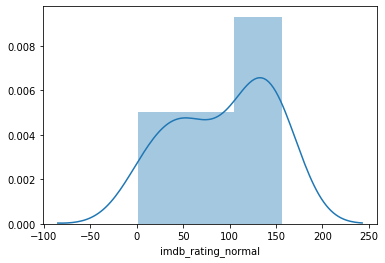

In [107]:
sns.distplot(movie_ind_no_null['imdb_rating_normal'])

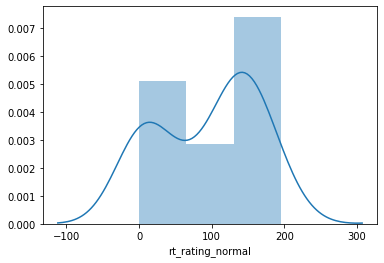

In [108]:
sns.distplot(movie_ind_no_null['rt_rating_normal'])

In [109]:
movie_ind_no_null.loc[:,['imdb_rating_normal','rt_rating']].corr()

,imdb_rating_normal,rt_rating
imdb_rating_normal,1.000000,0.576263
rt_rating,0.576263,1.000000


In [110]:
model=smf.ols('rt_rating_normal~imdb_rating',data=movie_ind_no_null).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rt_rating_normal   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.290
Date:                Tue, 17 Nov 2020   Prob (F-statistic):             0.0817
Time:                        17:52:01   Log-Likelihood:                -150.12
No. Observations:                  27   AIC:                             304.2
Df Residuals:                      25   BIC:                             306.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.5817     65.851     -0.343      0.735    -158.204     113.040
imdb_rating     1.5868      0.875      1.814      0.082      -0.215       3.389
==============================================================================
Omnibus:                        1.010   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.565
Skew:                           0.354   Prob(JB):                        0.754
Kurtosis:                       2.966   Cond. No.                         394.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""